# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `12`
* Students: `Arnaud Duvieusart, Omar Boujdaria, Franck Dessimoz and Adrien Vandenbroucque`
* Dataset: `Flight Routes`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [42]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [43]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [44]:
#Load the adjacency matrix from previous milestone
adjacency =  np.load('adj.npy')
n_nodes =  len(adjacency)

***As advised in the Milestone session, we set the diagonal of our adjacency matrix to zero:***

In [45]:
#Set the diagonal elements to 0
np.fill_diagonal(adjacency, 0)

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

***As seen in the lectures, we compute the graph Laplacian as $L = D - A$, where $D$ is a diagonal matrix whose values are the degrees of the nodes, and $A$ is the adjacency matrix***

***The normalized graph Laplacian is then computed as $L_{norm} = D^{-1/2}LD^{-1/2}$.***

In [12]:
#Compute the matrix D of degrees
D = np.diag(np.sum(adjacency, axis=0))

#Compute the grah laplacian and store in CSR format
laplacian_combinatorial =  sparse.csr_matrix(D - adjacency)

#Compute the normalized graph laplacian and store in CSR format
inverse_sqrt_D = scipy.linalg.inv(scipy.linalg.sqrtm(D))
laplacian_normalized = sparse.csr_matrix(inverse_sqrt_D @ laplacian_combinatorial @ inverse_sqrt_D)

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [13]:
laplacian = laplacian_combinatorial

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [14]:
#Compute all the eigenvalues and eigenvectors using eigh()
eigenvalues, eigenvectors =  scipy.linalg.eigh(laplacian_combinatorial.toarray())
eigenvalues_norm, eigenvectors_norm =  scipy.linalg.eigh(laplacian_normalized.toarray())

assert eigenvectors.shape == (n_nodes, n_nodes)
assert eigenvectors_norm.shape == (n_nodes, n_nodes)

Justify your choice of eigensolver.

***Since our adjacency matrix is symmetric, the Laplacian is also symmetric. Also, since we need to compute all the eigenvalues and eigen vectors, we used the `eigh()` function from `scipy.linalg`. Indeed, we couldn't use the one from the sparse module since it doesn't allow to compute all the eigenvalues and eigenvectors.***

***We used the `eigh()` function instead of the `eig()` function since our graph Laplacian matrix is symmetric.***

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

***$S$ is the incidence matrix, which is defined as follow :***
$S(i,j) = 
     \begin{cases}
       1 &\quad\text{if } e_j = (v_i, v_k)\text{ for some }k \\
       -1 &\quad\text{if } e_j = (v_k, v_i)\text{ for some }k \\
       0 &\quad\text{otherwise}\\
     \end{cases}$


***Thus $S^Tx$ compute the gradient of $x$, where $x$ is a vertex defined on $\mathbb{R}^N$.***

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

**The incidence matrix $S$ satisfies $SS^T = L$.**

***Hence the eigendecomposition of L gives us :
$$\begin{equation}
\begin{aligned}
λ{k} &= u{k}^TLu_{k} \\
&= u_{k}^TSS^Tu_{k} \\ 
&= (S^Tu_{k})^T(S^Tu_{k}) \\
&= \| S^T u_k \|_2^2 
\end{aligned}
\end{equation}$$*

**Where the third equality is optained since $(AB)^\top = B^\top A^\top$**

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

***We have that $\|S^Tx\|_2^2 = (S^Tx)^T(S^Tx) = x^TSS^Tx = x^TLx$ measures the smoothness of the signal $x$. Indeed, it computes a value that can be interpreted as a gradient.***

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

In [59]:
print(eigenvectors[0])
print(eigenvectors_norm[0])

[-1.54861877e-03  1.07862260e-02 -1.28369512e-02 ... -3.24205165e-07
  2.82898440e-07 -2.68854032e-07]
[-6.81272212e-06 -4.31190320e-03 -9.24294387e-03 ... -2.36178981e-47
  4.92117247e-43 -4.17624926e-43]


### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

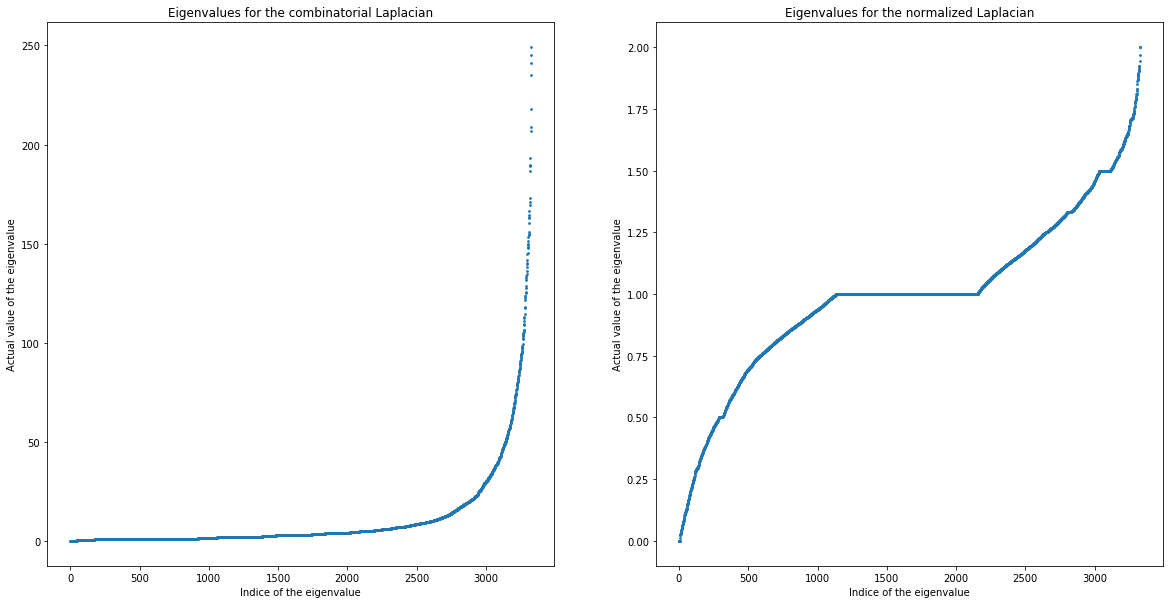

In [15]:
#Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

#Plot the eigenvalues for the combinatorial laplacian
ax1.scatter(x=list(range(len(eigenvalues))), y=eigenvalues, s=3)
ax1.set_title('Eigenvalues for the combinatorial Laplacian')
ax1.set_xlabel('Indice of the eigenvalue')
ax1.set_ylabel('Actual value of the eigenvalue')

#Plot the eigenvalues for the normalized laplacian
ax2.scatter(x=list(range(len(eigenvalues_norm))), y=eigenvalues_norm, s=3)
ax2.set_title('Eigenvalues for the normalized Laplacian')
ax2.set_xlabel('Indice of the eigenvalue')
ax2.set_ylabel('Actual value of the eigenvalue')

plt.show()

**Your answer here.**

How many connected components are there in your graph? Answer using the eigenvalues only.

***As seen in the lectures, the information about the connectivity of the graph is found in the multiplicity of the first eigenvalue $\lambda_0$, which is equal to $0$.***

***Note that here, since the `eigh()` function returns an approximation of the eigenvalues, we actually don't have $0$ as smallest eigenvalue, but things like $2\cdot 10^{-15}$, which actually represent $\lambda_0$. So in order to retrieve the number of eigenvalues with value $0$, we put a threshold at $10^{-10}$, and all values below it are set to $0$.***

***Now, we just need to count how many eigenvalues with value $0$ there are, and this will give us the number of connected components.***

In [16]:
#Set a threshold
threshold = 1e-10

#Map eigenvalues that are lower than threshold to 0
eigenvalues = [0 if e < threshold else e for e in eigenvalues]

#Compute lambda_0 = 0
lambda_0 = np.min(eigenvalues)

#Count how many are equal to lambda_0
n_connected_components = np.count_nonzero(eigenvalues == lambda_0)

print('Number of connected components: ', n_connected_components)

Number of connected components:  7


***As we can see, the number of connected components that we find match the number we got in the Milestone 1.***

Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

In [17]:
lambda_max = np.max(eigenvalues)
lambda_max_norm = np.max(eigenvalues_norm)
print('Largest eigenvalue for the combinatorial Laplacian: ', lambda_max)
print('Largest eigenvalue for the normalized Laplacian: ', lambda_max_norm)

Largest eigenvalue for the combinatorial Laplacian:  249.2168353102242
Largest eigenvalue for the normalized Laplacian:  2.0000000000000013


***For the combinatorial Laplacian, the largest eigenvalue seems to be bounded by $250$.***

***For the normalized Laplacian, the largest eigenvalue is $2$, which follows from the theoretical bound derived in class.***

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

***For this part, as advised by the TAs, we only keep the largest connected components for this part.***

***So we simply reuse our code from Milestone 1 to get the largest connected component of our graph.***

In [46]:
def dfs(graph, node, visited):
    #mark current node as visited
    if visited[node] == 0:
        visited[node] = 1
    
    #find all possible links from current node and visit the unvisited nodes
    for i,n in enumerate(graph[node]):
        if n==1 and visited[i]==0:
            dfs(graph,i, visited)
    return visited

def find_components(adjacency, start = 0):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    #base case of the recursion
    if adjacency.shape == (0, 0):
        return []
    
    components = []
    
    #initialize the "visited" array
    visited = np.zeros(adjacency.shape[0])
    
    #find one of the CC
    visited = dfs(adjacency,start,visited)
    
    #find unvisited nodes
    visited = visited.astype(bool)
    inv_visited = np.invert(visited)
        
    new = adjacency[:,visited][visited]
    remaining = adjacency[:,inv_visited][inv_visited]
    
    #add the CC we found to the list of CCs
    components.append(new)
    
    #recursion to find remaining CCs
    return components + find_components(remaining)

In [47]:
#Compute the largest connected component
connected_components = find_components(adjacency)
len_components = [len(c) for c in connected_components]

adjacency = connected_components[np.argmax(len_components)]
n_nodes = len(adjacency)

***And so we recompute the Laplacian for this new graph:***

In [48]:
#Compute the matrix D of degrees
D = np.diag(np.sum(adjacency, axis=0))

#Compute the grah laplacian and store in CSR format
laplacian_combinatorial =  sparse.csr_matrix(D - adjacency)

#Compute the normalized graph laplacian and store in CSR format
inverse_sqrt_D = scipy.linalg.inv(scipy.linalg.sqrtm(D))
laplacian_normalized = sparse.csr_matrix(inverse_sqrt_D @ laplacian_combinatorial @ inverse_sqrt_D)

In [49]:
laplacian = laplacian_combinatorial

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

***Graph embeddings provide a mapping from a network to a vector space while preserving all important properties from the network. It maps high dimension data points to lower dimension points and preserves the similarities. This means that similar points are embedded close to each other.***

***In general, we use graph embeddings in order to represent a graph in a vector space of a certain dimension.***

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

***We create below a function that computes the embedding for our graph in a specified dimension. As required, we get the first $k$ eigenvectors using the sparse module in order to speed up the computations. We also return the Fiedler vector, since it will be useful for the clustering part.***

***We also allow the user to specifiy whether he wants to normalize the eigenvectors by the degree. If yes, we simply compute: $U_{norm} = D^{-1/2}U$, where $U$ is a matrix containing the first $k$ eigenvectors.***

In [94]:
def compute_embedding_fiedler(laplacian, dim, normalized_eig=False):
    """Given a graph laplacian and a target dimension, this function
    computes a graph embedding in the chosen dimension. There is the
    option to normalize the eigenvectors in the process."""
    
    #Compute the k first eigenvectors (k depends on the target dimension)
    k_eigenvalues, k_eigenvectors = scipy.sparse.linalg.eigsh(laplacian, k=1+dim, which='SA')

    #Normalize the eigenvectors if needed
    if normalized_eig:
        k_eigenvectors = inverse_sqrt_D @ k_eigenvectors
        
    #Compute the fiedler vector
    fiedler_vector = k_eigenvectors[:, 1]

    #Compute the embedding for each node
    embedding = np.zeros((n_nodes, dim))
    for i in range(n_nodes):
        for k_th in range(dim): 
            embedding[i, k_th] = k_eigenvectors[i, 1+k_th]
            
    return embedding, fiedler_vector

***We now compute the 2D embedding of our graph:***

In [65]:
embedding_2d, fiedler_vector = compute_embedding_fiedler(laplacian, 2, normalized_eig=False)

[3.50808075e-15 3.90903440e-02 5.54237524e-02]


Plot the nodes embedded in 2D. Comment on what you see.

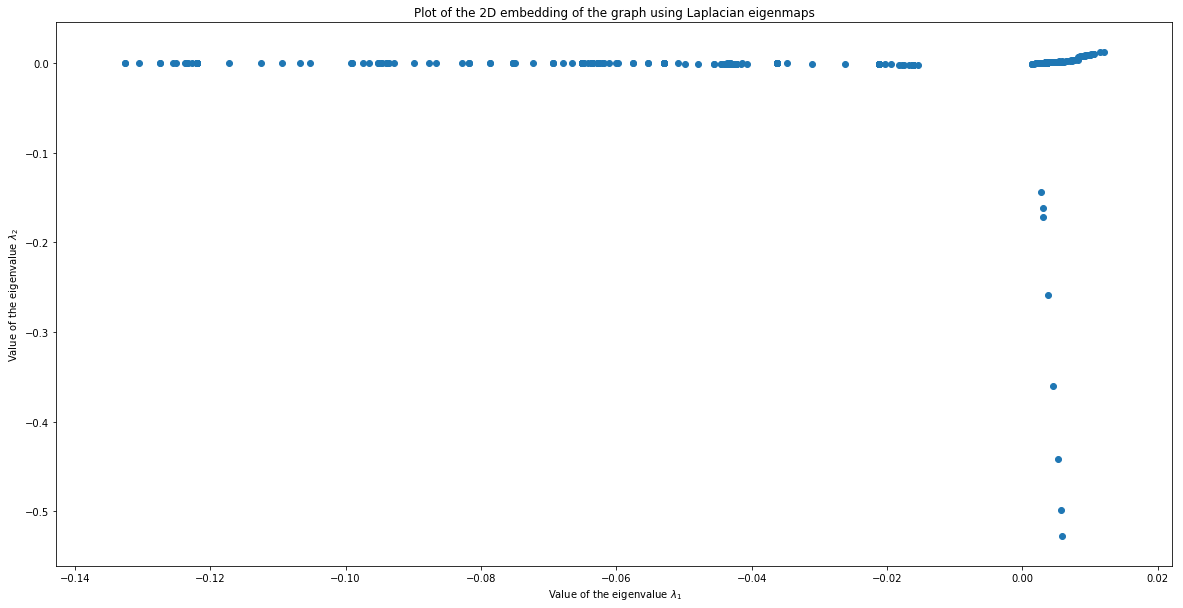

In [69]:
plt.figure(figsize=(20, 10))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1])
plt.xlabel('Value of the eigenvalue $\lambda_1$')
plt.ylabel('Value of the eigenvalue $\lambda_2$')
plt.title('Plot of the 2D embedding of the graph using Laplacian eigenmaps')
plt.show()

**Your answer here.**

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

***The embedding $Z$ will preserve the number of nodes, and their connectivity, as it is a smooth function over the original graph : connectivity between nodes is governed by the proximity of neighboring points. The points close to each other are mapped close to each other in the low-dimensional space, preserving local distances.***

## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

***As seen in class, we want to choose $k$, which is the number of clusters, such that the eigenvalues $\lambda_{1}, ..., \lambda_{k}$ are small but $\lambda_{k+1}$ is larger, since if data has $k$ clear clusters, there will be a gap in the Laplacian spectrum bewteen $\lambda_{k}$ and $\lambda_{k+1}$. A way to find $k$ is to look a the multiplicity of the eigenvalue $0$. Finally once we have chosen $k$, we can take $d$ to be equal to the number of clusters $k$, as suggested by the spectral clustering algorithm seen during the lectures.***

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

***We first embed our graph in the dimsension we chose.***

In [99]:
nodes_embedded, fiedler_vector = compute_embedding_fiedler(laplacian, 2, normalized_eig=True)

[-1.92720871e-14  3.90903440e-02  5.54237524e-02]


***Below, we define a function that will compute the cluster assignment of the nodes. If the nodes are in dimension 2 (and so we will compute 2 clusters), then we use the Fiedler vector to partition the nodes. Otherwise we use the `Kmeans()` function from ScikitLearn.***

In [87]:
def compute_clustering(nodes, fiedler_vector):
    """Given embedded nodes and a fiedler vector,
    computes a cluster assigment for the nodes"""
    
    #If embedded in 2D, use Fiedler vector
    if nodes.shape[1] == 2:
        predictions = np.sign(fiedler_vector)
    else:#Use K-means
        predictions = KMeans(n_clusters=nodes.shape[1], random_state=0).fit_predict(nodes)
    return predictions

In [88]:
cluster_assignment = compute_clustering(nodes_embedded, fiedler_vector)

# Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

***Since kmeans returns a vectir of size N***

In [89]:
#TODO

**Your answer here.**

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

In [90]:
# Your code here.

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

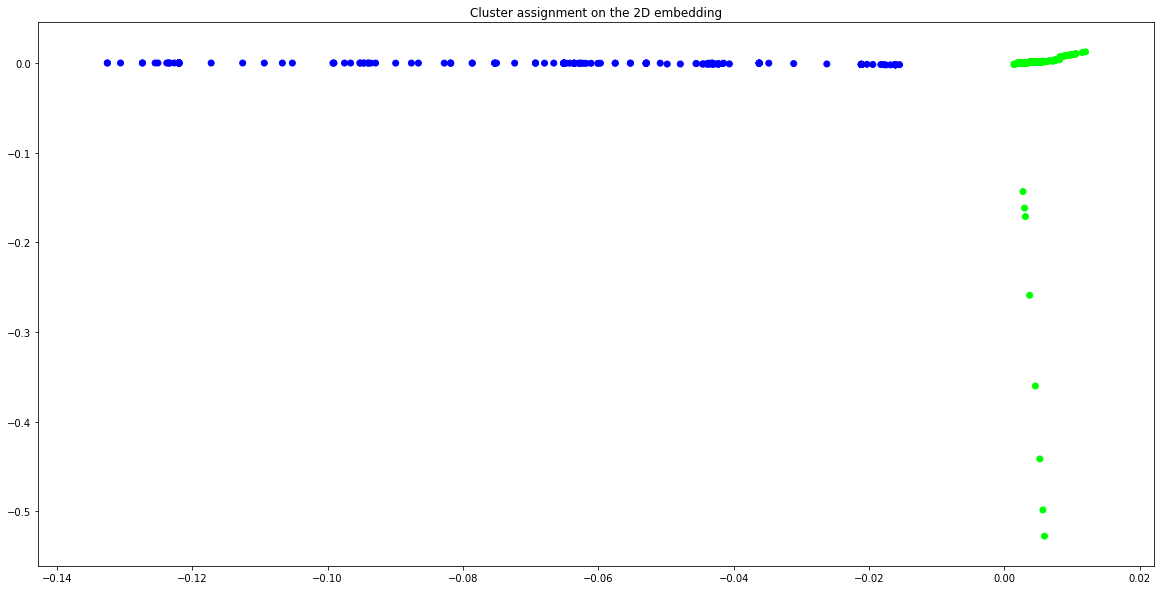

In [100]:
plt.figure(figsize=(20, 10))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_assignment, cmap='brg')
plt.title("Cluster assignment on the 2D embedding")
plt.show()

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

**Your answer here.**